<a href="https://colab.research.google.com/github/Lawrence-Krukrubo/EDA/blob/master/gads_wk_6_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><h1>GADS 2020:</b></h1>

<h2><b>Analysing The Leader Board for Learners at the end of Learning Phase One</b></h2>

<h4>Date: 31st July 2020</h4>

<h4>Data Specialist: Lawrence Krukrubo</h4>

In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from bs4 import BeautifulSoup
import requests  # library to handle requests

In [354]:
site_link = 'http://community.andela.com/index.php/leadership-board/'

We need to scrape the data containing the table from the website saved as `site_link`. <br>First, let's get the source code from the website

In [355]:
source = requests.get(site_link).text

Lets Use BeautifulSoup to parse it

In [356]:
soup = BeautifulSoup(source, 'lxml')

# Let's pretty print it and see what it looks like

#print(soup.prettify())

Next let's get the table that contains the data we want to scrape

In [357]:
my_table = soup.find_all('td')

# Let's view the first 20 lines from the table
my_table[:20]

[<td width="112px"><img alt="" class="alignnone wp-image-3299" height="111" src="http://community.andela.com/wp-content/uploads/2020/06/Top-learner.png" width="112"/></td>,
 <td>
 <h3><strong><span style="font-size: 16px;">Okwuchukwu Nwachukwu</span></strong></h3>
 <p>229 learning hours. <strong>Nigeria</strong>.</p></td>,
 <td width="112px"><img alt="" class="alignnone wp-image-3299" height="111" src="http://community.andela.com/wp-content/uploads/2020/06/Top-learner.png" width="112"/></td>,
 <td>
 <h3>Pharis Muigai</h3>
 <p>223 learning hours.<strong>Kenya.</strong></p></td>,
 <td width="191px"><img alt="" class="alignnone wp-image-3454" height="103" src="http://community.andela.com/wp-content/uploads/2020/06/skill-IQ-trimmed.png" width="191"/></td>,
 <td>
 <h3>Ahmed Hany</h3>
 <p>300 skill IQ Score. <strong>Egypt.</strong></p></td>,
 <td width="191px"><img alt="" class="alignnone wp-image-3454" height="103" src="http://community.andela.com/wp-content/uploads/2020/06/skill-IQ-trimmed

Next let's iterate through each link and append only the text parts

In [358]:
# First let's see what kind of object this table is
type(my_table)

bs4.element.ResultSet

In [359]:
table_text = []

for data in my_table:
    table_text.append(data.text)

print(len(table_text))

81434


Let's see the cleaned text, without the html tags

In [360]:
# So we see that the relevent text we need starts from the index 8 till the end
# So let's display from just 8 to 26, displaying data for first 3 students

table_text[8:26]

['1',
 'Lukman Ahmed',
 'Nigeria',
 '35',
 '231',
 '258',
 '2',
 'Okwuchukwu Nwachukwu',
 'Nigeria',
 '34',
 '289',
 '229',
 '3',
 'Adebisi Yusuf',
 'Nigeria',
 '30',
 '288',
 '186']

Therefore let's make the table_text to start from index 8 till the end

In [361]:
table_text = table_text[8:]

# Let's sconfirm the length
len(table_text)

81426

Next, we create a dictionary with the right table columns as keys, then append the data for each student in the dictionary

In [362]:
student_dict = {'Rank':[], 'Name':[], 'Country':[], 'Total_points':[], 'SkillIQ_score':[], 'Learning_hours':[]}

So now we need to iterate through the list of table texts and append student details accordingly to the students dictionary above.

In [363]:
# First let's make a copy of the table_text to be on the safe side
table_text_copy = table_text[:]
len(table_text_copy)

81426

In [364]:
stopper = 6  # setting an index stopper variable

while True:
    
    if not table_text_copy: 
        break

    for i in range(stopper):
        if i == 1:
            student_dict['Name'].append(table_text_copy[i])
        elif i == 2:
            student_dict['Country'].append(table_text_copy[i])
        elif i == 3:
            student_dict['Total_points'].append(table_text_copy[i])
        elif i == 4:
            student_dict['SkillIQ_score'].append(table_text_copy[i])
        elif i == 5:
            student_dict['Learning_hours'].append(table_text_copy[i])
        else:
            student_dict['Rank'].append(table_text_copy[i])

    if table_text_copy:
        table_text_copy = table_text_copy[stopper:]

Now that we have a dictionary containing details for all learners as at 31st July, lets start data preprocessing.<br> First, let's put the data set in a pandas Data Frame

In [365]:
gads_df = pd.DataFrame(student_dict)
gads_df.head()

,Rank,Name,Country,Total_points,SkillIQ_score,Learning_hours
0,1,Lukman Ahmed,Nigeria,35,231,258
1,2,Okwuchukwu Nwachukwu,Nigeria,34,289,229
2,3,Adebisi Yusuf,Nigeria,30,288,186
3,4,Pharis Muigai,Kenya,28,151,223
4,5,Evans Nandwa,Kenya,27,146,217


Let's see the shape of the data set to confirm we captured all records for all students on the leader board

In [366]:
print(gads_df.shape)

(13571, 6)


Some questions to look at:
1. The Top 5000 Learners: what are their qualities, mean learning time, divide by 6 to find mean weekly learning time. mean top score and any other metric 
2. The Top Learners per country
3. Find active students: defined as those who score minimum of 100 or minimum of 10 hours
4. Find correlation between The various appraisal metrics of the program

In [367]:
gads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13571 entries, 0 to 13570
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            13571 non-null  object
 1   Name            13571 non-null  object
 2   Country         13571 non-null  object
 3   Total_points    13571 non-null  object
 4   SkillIQ_score   13571 non-null  object
 5   Learning_hours  13571 non-null  object
dtypes: object(6)
memory usage: 636.3+ KB


From the info() method, we can see that all the data is type object or categorical.<br> We need to convert the numerical columns to integers so we can make use them for our analysis

In [368]:
gads_df[['Rank', 'Total_points', 'SkillIQ_score', 'Learning_hours']] = gads_df[['Rank', 'Total_points', 'SkillIQ_score', 'Learning_hours']].astype('int')

Let's see the info() method again

In [369]:
gads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13571 entries, 0 to 13570
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            13571 non-null  int64 
 1   Name            13571 non-null  object
 2   Country         13571 non-null  object
 3   Total_points    13571 non-null  int64 
 4   SkillIQ_score   13571 non-null  int64 
 5   Learning_hours  13571 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 636.3+ KB


Nice one, let's see some summary Statistics about the data

In [370]:
gads_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,13571.0,6786.000000,3917.754586,1.0,3393.5,6786.0,10178.5,13571.0
Total_points,13571.0,6.269914,3.450057,0.0,4.0,6.0,8.0,35.0
SkillIQ_score,13571.0,120.315010,72.272350,0.0,80.0,129.0,170.0,300.0
Learning_hours,13571.0,19.388402,18.632124,0.0,9.0,15.0,24.0,258.0


The summary descriptive Statistics data above tells us a lot about the entire data set;

1. Total count of learners as at 30th July for learning-Phase-1 is **12,969**.
2. The average learning hours so far is 19 hours.
3. The average Skill IQ Score is 117.
4. The inter-quartile ranges also tell us that 75% of Learners did no more than 24 hours and scored no more than 168 IQ Scores.
5. We can also see that the minimum Skill IQ Score is 0 and max  is 300, while minimum Learning hours is 0 and max is 258.

Let's see our data again

In [371]:
gads_df.head(10)

,Rank,Name,Country,Total_points,SkillIQ_score,Learning_hours
0,1,Lukman Ahmed,Nigeria,35,231,258
1,2,Okwuchukwu Nwachukwu,Nigeria,34,289,229
2,3,Adebisi Yusuf,Nigeria,30,288,186
3,4,Pharis Muigai,Kenya,28,151,223
4,5,Evans Nandwa,Kenya,27,146,217
5,6,Gatchang Stephen,South Sudan,26,150,209
6,7,Francis Obetta,Nigeria,25,280,148
7,8,Khalil Henchi,Tunisia,25,111,211
8,9,Seyum Alemayehu,Ethiopia,24,274,138
9,10,Ngozichukwu Uzoigwe,Nigeria,24,119,200


Let's finetune the data some more, let's replace the index with the rank column

In [372]:
gads_df.set_index('Rank', drop=True, inplace=True)

gads_df.head(10)

,Name,Country,Total_points,SkillIQ_score,Learning_hours
Rank,,,,,
1,Lukman Ahmed,Nigeria,35,231,258
2,Okwuchukwu Nwachukwu,Nigeria,34,289,229
3,Adebisi Yusuf,Nigeria,30,288,186
4,Pharis Muigai,Kenya,28,151,223
5,Evans Nandwa,Kenya,27,146,217
6,Gatchang Stephen,South Sudan,26,150,209
7,Francis Obetta,Nigeria,25,280,148
8,Khalil Henchi,Tunisia,25,111,211
9,Seyum Alemayehu,Ethiopia,24,274,138


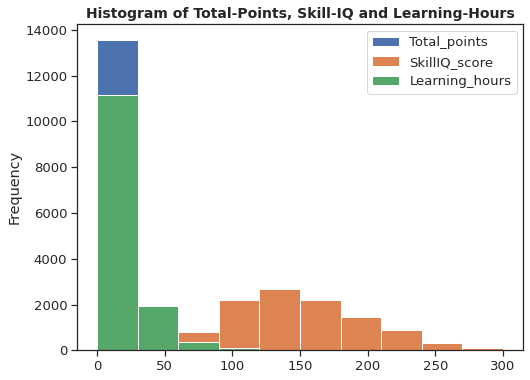

In [373]:
sns.set_style('ticks')
gads_df.plot(kind='hist', figsize=(8,6))
plt.title('Histogram of Total-Points, Skill-IQ and Learning-Hours',fontsize=14, fontweight='bold')
plt.show()

<h3>What does the Histogram tell us?</h3>

1. Total points have a distribution between 0 and 25
2. Learning Hours is concentrated between 0 and 25, but we have about 2000 students learning between 25 and 50 hours. We have about 400 students learning between 50 and 100 hours. Finally we have an outlier of very few students betwen 100 and 258 learning hours.
3. The distribution of SkillIQ score has a rather uniform distribution, but ofcourse it peaks around 120 to 150 bin.

Next, let's create a Data Frame of students that met either the minimum 100 points or 10 learning hours

In [374]:
qualified_students_df = gads_df[(gads_df['SkillIQ_score'] >= 100) | (gads_df['Learning_hours'] >= 10)]

qualified_students_df.head()

,Name,Country,Total_points,SkillIQ_score,Learning_hours
Rank,,,,,
1,Lukman Ahmed,Nigeria,35,231,258
2,Okwuchukwu Nwachukwu,Nigeria,34,289,229
3,Adebisi Yusuf,Nigeria,30,288,186
4,Pharis Muigai,Kenya,28,151,223
5,Evans Nandwa,Kenya,27,146,217


Let's see the total number of students that have this minimum qualification

In [375]:
print(f'The number of minimum qualified students is {len(qualified_students_df)}, out of {len(gads_df)} total students. \
\nThis leaves a difference of {len(gads_df) - len(qualified_students_df)} Non-qualified students')

The number of minimum qualified students is 13571, out of 13571 total students. 
This leaves a difference of 0 Non-qualified students


Wow! The data as at today 31st July states that out of 13,571 students, all students are quaified. This means every learner did atleast 10 learning hours or 100 skillIQ or both.

In [376]:
qualified_students_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_points,13571.0,6.269914,3.450057,0.0,4.0,6.0,8.0,35.0
SkillIQ_score,13571.0,120.315010,72.272350,0.0,80.0,129.0,170.0,300.0
Learning_hours,13571.0,19.388402,18.632124,0.0,9.0,15.0,24.0,258.0


Let's see histograms of Qualified Students Quantitaive Data

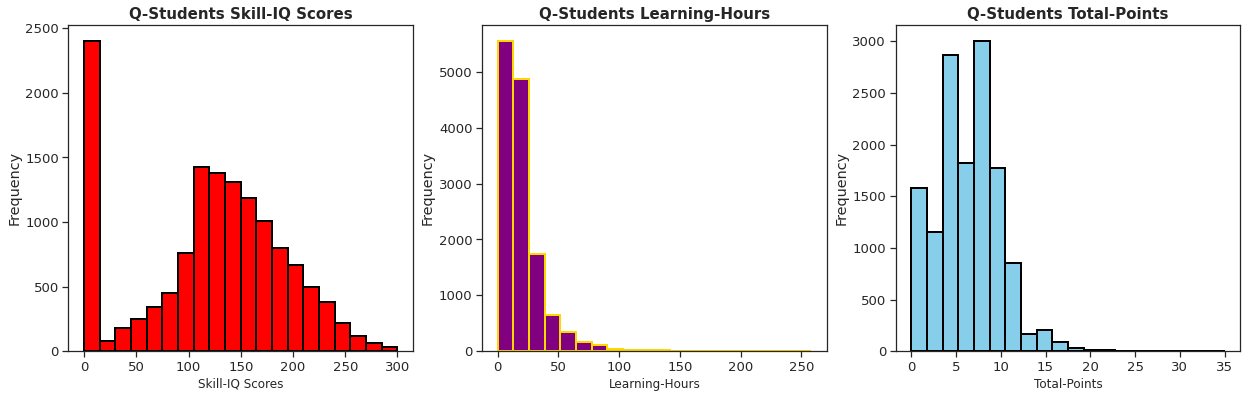

In [377]:
fig = plt.figure(figsize=(21,6))
sns.set_style('ticks')
fig.add_subplot(1,3,1)
qualified_students_df.SkillIQ_score.plot(kind='hist', linewidth=2, edgecolor='black', color='red', bins=20)
plt.title('Q-Students Skill-IQ Scores', fontsize=15, fontweight='heavy')
plt.xlabel('Skill-IQ Scores', fontsize=12)

fig.add_subplot(1,3,2)
qualified_students_df.Learning_hours.plot(kind='hist', linewidth=2, edgecolor='gold', color='purple', bins=20)
plt.title('Q-Students Learning-Hours', fontsize=15, fontweight='heavy')
plt.xlabel('Learning-Hours', fontsize=12)

fig.add_subplot(1,3,3)
qualified_students_df.Total_points.plot(kind='hist', linewidth=2, edgecolor='black', color='skyblue', bins=20)
plt.title('Q-Students Total-Points', fontsize=15, fontweight='heavy')
plt.xlabel('Total-Points', fontsize=12)

plt.show()

<h3>Interpret The Histogram</h3>

1. Skill-IQ histogram is roughly uniformly distributed. With a unimodal shape at the beginning containing large numbers of values between 0 and 15 IQ scores.

2. The learning hours Histogram is also Unimodal at the same 0 to 15 range. But the histogram is heavliy right-skewed with higher values that pull the tail of the histogram to the 258 mark.

3. Total points histogram is Bimodal around 5 and 9 points. It roughly appears symmetrical between 0 and 12. But like learning-hours, it contains outliers that right-slew its shape down to the 35 mark.


Let's see a Box-Plot of the distributions of qualified students

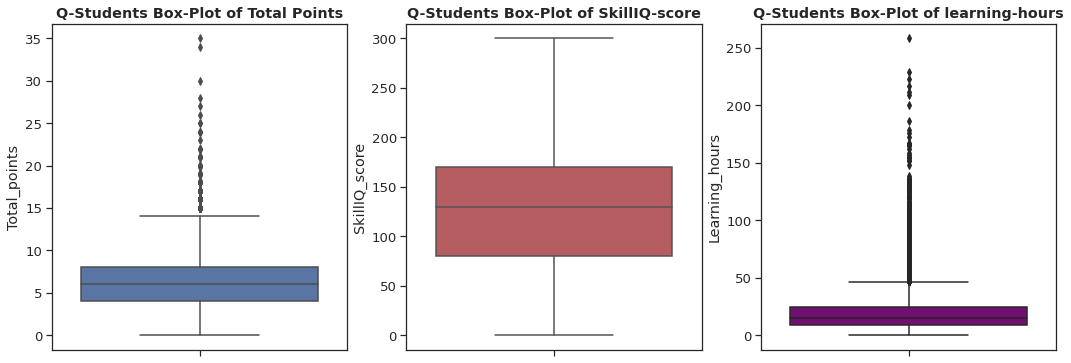

In [378]:
qualified_metrics = qualified_students_df[['SkillIQ_score', 'Learning_hours', 'Total_points']]

fig = plt.figure(figsize=(18,6))
sns.set_style('ticks')
ax0 = fig.add_subplot(131)
ax1 = fig.add_subplot(132)
ax2 = fig.add_subplot(133)

sns.boxplot(qualified_metrics.Total_points, ax=ax0, orient='v')
ax0.set_title('Q-Students Box-Plot of Total Points',fontweight='heavy')

sns.boxplot(qualified_metrics.SkillIQ_score, color='r', orient='v', ax=ax1)
ax1.set_title('Q-Students Box-Plot of SkillIQ-score',fontweight='heavy')

sns.boxplot(qualified_metrics.Learning_hours, color='purple', orient='v', ax=ax2)
ax2.set_title('Q-Students Box-Plot of learning-hours',fontweight='heavy')

plt.show()

<h3>Interpret The Box-Plot:</h3>
Generally, the Box-plots for Total-Points and Learning-Hours contain a lot of outliers, while that of SkillIQ, contains no outlier. Lets look closer.

<h4>1. Box-Plot for Total-Points:</h4>

The minimum value is 0 and maximum 1s about 14.9, then we have outliers from point number 15 up to 35, this makes the histogram to be right skewed as seen above. The Box-plot also shows that 75% of Qualified Learners, scored no more than 8 points with 50% scoring no more than 6 total points.

<h4>2. Box Plot for Skill-IQ score:</h4>

The minimum score is also 0 and maximum is 300. We also see that 75% of Qualified learners do not score above 170. The data is roughly randomly distributed, but we still have a large contration of low figures as seen in the Skill-IQ histogram above causing a Unimodal shape at the beginning of the histogram. Also 50% of all Qualified learners, do not score more than 130 skill-IQ scores.

<h4>3. Box Plot for Learning-Hours:</h4>

The minimum value is 0 and maximum is about 50. But we have outliers from aound 51 to 258. We also see that 75% of Qualified learners do not have above 24 learning hours. with 50% of all Qualified learners learning less than 16 hours total.



<h3>Skewness and Kurtosis:</h3>

Skewness tells us about the shape of the distribution of the data, in respect to the symmetry. While Kurtosis tells us about the outliers in the data. The larger the kurtosis, the more outliers are present and the longer the tail in the distribution

Let's calculate the kurtosis

In [409]:
def calculate_kurtosis(series):

    n = len(series)
    mean = np.mean(series)
    std = np.std(series)

    temp = np.sum((series - mean)**4)
    kurtosis = (1/n) * (temp / (std**4))
    
    return np.round(kurtosis,2)

In [412]:
learning_hours_kurtosis = calculate_kurtosis(qualified_students_df.Learning_hours)
total_points_kurtosis = calculate_kurtosis(qualified_students_df.Total_points)
skill_iq_kurtosis = calculate_kurtosis(qualified_students_df.SkillIQ_score)

print(f'The Kurosis for Learning-Hours is: {learning_hours_kurtosis}\
      \nThe Kurtosis for Total-points is: {total_points_kurtosis}\
      \nThe Kurtosis for Skill-IQ is: {skill_iq_kurtosis}')

The Kurosis for Learning-Hours is: 19.77      
The Kurtosis for Total-points is: 4.82      
The Kurtosis for Skill-IQ is: 2.32


From the above exercise, we can see that Skill-IQ has very little outliers if any of 2.32, while Total-points has 4.82, and the largest outliers-based distribution is Learning-Hours.

In [379]:
qualified_students_df.head()

,Name,Country,Total_points,SkillIQ_score,Learning_hours
Rank,,,,,
1,Lukman Ahmed,Nigeria,35,231,258
2,Okwuchukwu Nwachukwu,Nigeria,34,289,229
3,Adebisi Yusuf,Nigeria,30,288,186
4,Pharis Muigai,Kenya,28,151,223
5,Evans Nandwa,Kenya,27,146,217


Out of these 13,571 total qualified students, let's see those who met only minimum IQ scores

In [381]:
skill_only = qualified_students_df.query('SkillIQ_score >= 100 and Learning_hours < 10')
print(len(skill_only))
# let's see the head
skill_only.head()

3603


,Name,Country,Total_points,SkillIQ_score,Learning_hours
Rank,,,,,
661,Lameck Otieno,Kenya,12,298,6
675,Oluwasegun Wahaab,Nigeria,12,292,8
727,Maduabughichi Achilefu,Nigeria,12,284,9
798,Latevi Severin Lawson-Avunsu,Togo,12,298,2
826,Adewale Ijalana,Nigeria,12,290,5


So out of total qualified students, we see that 3603 met the cut-off mark for SkillIQ_scores only, <br>without meeting the cut-off mark of 10 learning hours.

Now Let's see those who met only cut-off for learning hours, without meetin Skill_IQ score

In [382]:
learning_only = qualified_students_df.query('SkillIQ_score < 100 and Learning_hours >= 10')
print(len(learning_only))
learning_only.head()

4051


,Name,Country,Total_points,SkillIQ_score,Learning_hours
Rank,,,,,
68,Olusegun Mayungbe,Nigeria,18,58,158
118,Bola Bally,Ghana,16,91,129
123,Mark Edosa,Nigeria,16,0,166
144,Patience Udoh,Nigeria,16,0,162
192,Tochukwu Nwosu,Nigeria,15,0,155


So out of total qualified students, we see that 4051 met the cut-off mark for Learning_hours only, <br>Without meeting the cut-off mark for SkillIQ.

Finally, let's see the data for Qualified stuedents that met both minimum skillIQ and learning hours

In [383]:
min_skill_and_hours = qualified_students_df.query('SkillIQ_score >=100 and Learning_hours >=10')
print(len(min_skill_and_hours))
min_skill_and_hours.head()

5917


,Name,Country,Total_points,SkillIQ_score,Learning_hours
Rank,,,,,
1,Lukman Ahmed,Nigeria,35,231,258
2,Okwuchukwu Nwachukwu,Nigeria,34,289,229
3,Adebisi Yusuf,Nigeria,30,288,186
4,Pharis Muigai,Kenya,28,151,223
5,Evans Nandwa,Kenya,27,146,217


Let's confirm the split

In [384]:
len(skill_only) + len(learning_only) + len(min_skill_and_hours)== len(qualified_students_df)

True

let's visualize this split, first let's create a method to split the status column accordind to the 3 groups we created just now

In [385]:
def split(row):
    if row[3] >= 100 and row[4] >= 10:
        return 'IQ-and-Hours'
    elif row[3] >= 100 and row[4] < 10:
        return 'IQ-Only'
    else:
        return "Hours-Only"

In [386]:
qualified_students_df['Status'] = qualified_students_df.apply(split, axis=1)

In [387]:
qualified_students_df.head(5)

,Name,Country,Total_points,SkillIQ_score,Learning_hours,Status
Rank,,,,,,
1,Lukman Ahmed,Nigeria,35,231,258,IQ-and-Hours
2,Okwuchukwu Nwachukwu,Nigeria,34,289,229,IQ-and-Hours
3,Adebisi Yusuf,Nigeria,30,288,186,IQ-and-Hours
4,Pharis Muigai,Kenya,28,151,223,IQ-and-Hours
5,Evans Nandwa,Kenya,27,146,217,IQ-and-Hours


Let's visualize this split

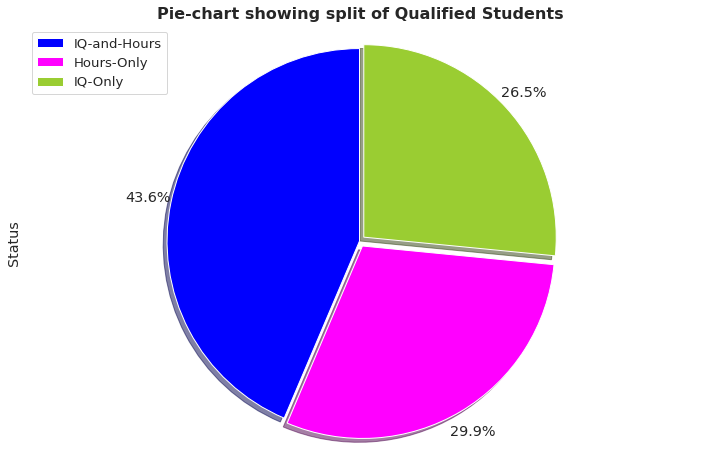

In [388]:
pie_df = qualified_students_df['Status'].value_counts().to_frame()

sns.set_style('ticks')
pie_df['Status'].plot(kind='pie',
            autopct='%1.1f%%',
            figsize=(12,8),
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.12,
            colors=['blue','magenta','yellowgreen'],
            explode=[0.0,0.03,0.03]
            )
plt.title('Pie-chart showing split of Qualified Students',y=1, fontsize=16, fontweight='bold')
plt.axis('equal')  # This creates a perfect equal circle
plt.legend(pie_df.index, loc='upper left')
plt.show()

So from the Piechart, we can see that:-<br>
Out of the Qualified 13,571 learners,

1. 43.6% or 5,917 learners qualified on both SkillIQ and Learning_hours.
2. 29% or 4,051 learners, qualified on only Learning-Hours.
3. 26.5% or 3,603 learners, qualified on only SkillIQ scores.

Let's compare the performance of these 3 groups on Total-Points, learning-Hours and Skill-IQ

1. let's see the group with the best average score for all categories
2. The group with the best highest score for all categories 
3. The group with the best minimum score for all categories

In [389]:
def create_average_df(value):
    """Takes a metric and creates a Dataframe.

    @Param: 
        value can only be either hour, skill or point
    """
    if value == 'hour':
        x = pd.DataFrame()
        x['minIQ+minHours'] = [np.mean(min_skill_and_hours.Learning_hours)]
        x['minHours_only'] = [np.mean(learning_only.Learning_hours)]
        x['minIQ_only'] = [np.mean(skill_only.Learning_hours)]

    elif value == 'skill':
        x = pd.DataFrame()
        x['minIQ+minHours'] = [np.mean(min_skill_and_hours.SkillIQ_score)]
        x['minHours_only'] = [np.mean(learning_only.SkillIQ_score)]
        x['minIQ_only'] = [np.mean(skill_only.SkillIQ_score)]
    
    else:
        x = pd.DataFrame()
        x['minIQ+minHours'] = [np.mean(min_skill_and_hours.Total_points)]
        x['minHours_only'] = [np.mean(learning_only.Total_points)]
        x['minIQ_only'] = [np.mean(skill_only.Total_points)]

    return x        

In [390]:
average_hours = create_average_df('hour')
average_skill = create_average_df('skill')
average_point = create_average_df('')

In [391]:
def create_min_df(value):
    """Takes a metric and creates a Dataframe.

    @Param: 
        value can only be either hour, skill or point
    """
    if value == 'hour':
        x = pd.DataFrame()
        x['minIQ+minHours'] = [np.min(min_skill_and_hours.Learning_hours)]
        x['minHours_only'] = [np.min(learning_only.Learning_hours)]
        x['minIQ_only'] = [np.min(skill_only.Learning_hours)]

    elif value == 'skill':
        x = pd.DataFrame()
        x['minIQ+minHours'] = [np.min(min_skill_and_hours.SkillIQ_score)]
        x['minHours_only'] = [np.min(learning_only.SkillIQ_score)]
        x['minIQ_only'] = [np.min(skill_only.SkillIQ_score)]
    
    else:
        x = pd.DataFrame()
        x['minIQ+minHours'] = [np.min(min_skill_and_hours.Total_points)]
        x['minHours_only'] = [np.min(learning_only.Total_points)]
        x['minIQ_only'] = [np.min(skill_only.Total_points)]

    return x        

In [392]:
min_hours = create_min_df('hour')
min_skill = create_min_df('skill')
min_point = create_min_df('')

In [393]:
def create_max_df(value):
    """Takes a metric and creates a Dataframe.

    @Param: 
        value can only be either hour, skill or point
    """
    if value == 'hour':
        x = pd.DataFrame()
        x['minIQ+minHours'] = [np.max(min_skill_and_hours.Learning_hours)]
        x['minHours_only'] = [np.max(learning_only.Learning_hours)]
        x['minIQ_only'] = [np.max(skill_only.Learning_hours)]

    elif value == 'skill':
        x = pd.DataFrame()
        x['minIQ+minHours'] = [np.max(min_skill_and_hours.SkillIQ_score)]
        x['minHours_only'] = [np.max(learning_only.SkillIQ_score)]
        x['minIQ_only'] = [np.max(skill_only.SkillIQ_score)]
    
    else:
        x = pd.DataFrame()
        x['minIQ+minHours'] = [np.max(min_skill_and_hours.Total_points)]
        x['minHours_only'] = [np.max(learning_only.Total_points)]
        x['minIQ_only'] = [np.max(skill_only.Total_points)]

    return x        

In [394]:
max_hours = create_max_df('hour')
max_skill = create_max_df('skill')
max_point = create_max_df('')

In [395]:
average_point.head()

,minIQ+minHours,minHours_only,minIQ_only
0,8.741592,2.753394,6.164585


<h3>Comparing Average Figures:</h3>

let's plot the data to compare average from these three groups

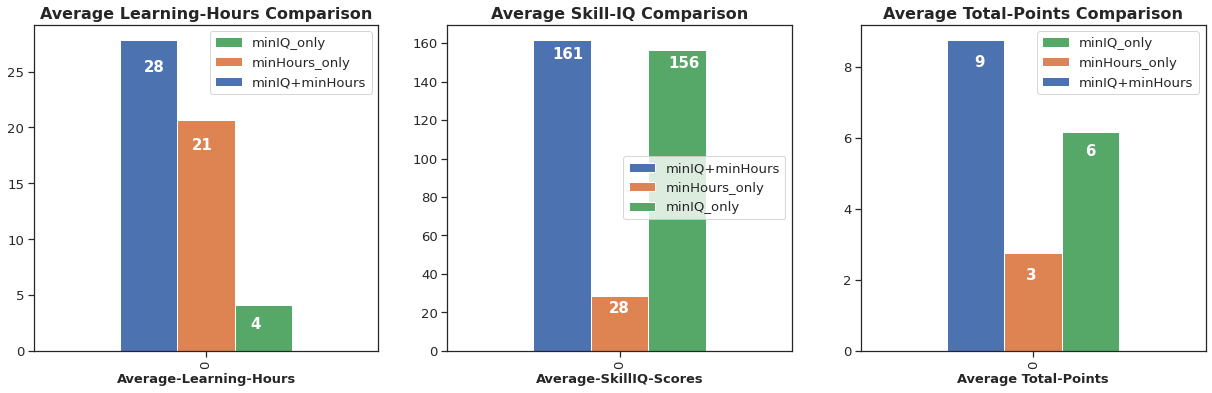

In [396]:
fig = plt.figure(figsize=(21,6))
ax0 = fig.add_subplot(131)
ax1 = fig.add_subplot(132)
ax2 = fig.add_subplot(133)

average_hours.plot(kind='bar',align='center',legend='reverse',ax=ax0)
ax0.text(-0.18,25,'28',color='w', fontweight='bold', fontsize=15)
ax0.text(-0.04,18,'21',color='w', fontweight='bold', fontsize=15)
ax0.text(0.13,2,'4',color='w', fontweight='bold', fontsize=15)
ax0.set_title('Average Learning-Hours Comparison', fontsize=16, fontweight='bold')
ax0.set_xlabel('Average-Learning-Hours',fontsize=13, fontweight='heavy')

average_skill.plot(kind='bar',align='center',legend='reverse', ax=ax1)
ax1.text(-0.194,152,'161',color='w', fontweight='bold', fontsize=15)
ax1.text(0.14,147,'156',color='w', fontweight='bold', fontsize=15)
ax1.text(-0.03,20,'28',color='w', fontweight='bold', fontsize=15)
ax1.set_title('Average Skill-IQ Comparison', fontsize=16, fontweight='bold')
ax1.set_xlabel('Average-SkillIQ-Scores',fontsize=13, fontweight='heavy')
ax1.legend(loc='center right')

average_point.plot(kind='bar',align='center',legend='reverse', ax=ax2)
ax2.text(-0.17,8,'9',color='w', fontweight='bold', fontsize=15)
ax2.text(0.15,5.5,'6',color='w', fontweight='bold', fontsize=15)
ax2.text(-0.02,2,'3',color='w', fontweight='bold', fontsize=15)
ax2.set_title('Average Total-Points Comparison', fontsize=16, fontweight='bold')
ax2.set_xlabel('Average Total-Points',fontsize=13, fontweight='heavy')

plt.show()

<b><h4>Comparing Average Inference:</h4></b>
We can clearly see that:-<br>
Learners who meet both the minimum skill-IQ score and minimum Learning-Hours seem to be the most serious set of learners. This is because:-

1. On average, they score `33%` higher Learning-hours than those who only qualify on Learning-hours, and `600%` higher Learning-hours than those who only qualify on skill-IQ
2. On average they score `3%` higher skill-IQ scores than those who only qualify on skill-IQ scores and `475%` higher skill-IQ scores than those who qualify on only learning-hours.
3. On average they score `200%` higher Total-points than those who qualify on only learning-hours and `50%` higher Total-points than those who qualify on only skill-IQ.


<h3>Comparing Minimum Figures:</h3>

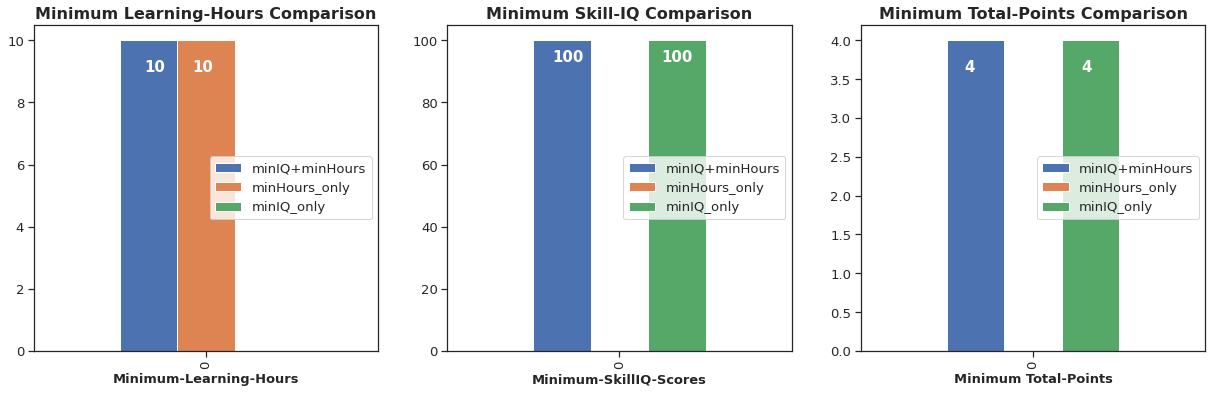

In [397]:
fig = plt.figure(figsize=(21,6))
ax0 = fig.add_subplot(131)
ax1 = fig.add_subplot(132)
ax2 = fig.add_subplot(133)

min_hours.plot(kind='bar',align='center',legend='reverse',ax=ax0)
ax0.text(-0.18,9,'10',color='w', fontweight='bold', fontsize=15)
ax0.text(-0.04,9,'10',color='w', fontweight='bold', fontsize=15)
#ax0.text(0.13,2,'0',color='w', fontweight='bold', fontsize=15)
ax0.set_title('Minimum Learning-Hours Comparison', fontsize=16, fontweight='bold')
ax0.set_xlabel('Minimum-Learning-Hours',fontsize=13, fontweight='heavy')
ax0.legend(loc='center right')

min_skill.plot(kind='bar',align='center',legend='reverse', ax=ax1)
ax1.text(-0.194,93,'100',color='w', fontweight='bold', fontsize=15)
#ax1.text(0.14,147,'0',color='w', fontweight='bold', fontsize=15)
ax1.text(0.12,93,'100',color='w', fontweight='bold', fontsize=15)
ax1.set_title('Minimum Skill-IQ Comparison', fontsize=16, fontweight='bold')
ax1.set_xlabel('Minimum-SkillIQ-Scores',fontsize=13, fontweight='heavy')
ax1.legend(loc='center right')

min_point.plot(kind='bar',align='center',legend='reverse', ax=ax2)
ax2.text(-0.2,3.6,'4',color='w', fontweight='bold', fontsize=15)
#ax2.text(0.15,5.5,'0',color='w', fontweight='bold', fontsize=15)
ax2.text(0.14,3.6,'4',color='w', fontweight='bold', fontsize=15)
ax2.set_title('Minimum Total-Points Comparison', fontsize=16, fontweight='bold')
ax2.set_xlabel('Minimum Total-Points',fontsize=13, fontweight='heavy')
ax2.legend(loc='center right')

plt.show()

<h3>Comparing Maximum Figures:</h3>

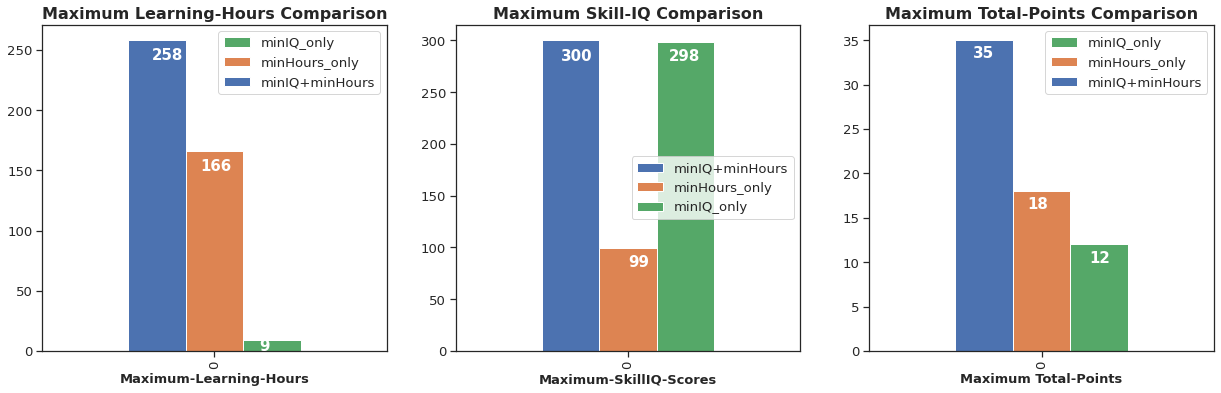

In [398]:
fig = plt.figure(figsize=(21,6))
ax0 = fig.add_subplot(131)
ax1 = fig.add_subplot(132)
ax2 = fig.add_subplot(133)

max_hours.plot(kind='bar',align='center',legend='reverse',ax=ax0)
ax0.text(-0.18,242,'258',color='w', fontweight='bold', fontsize=15)
ax0.text(-0.04,150,'166',color='w', fontweight='bold', fontsize=15)
ax0.text(0.13,0,'9',color='w', fontweight='bold', fontsize=15)
ax0.set_title('Maximum Learning-Hours Comparison', fontsize=16, fontweight='bold')
ax0.set_xlabel('Maximum-Learning-Hours',fontsize=13, fontweight='heavy')

max_skill.plot(kind='bar',align='center',legend='reverse', ax=ax1)
ax1.text(-0.194,280,'300',color='w', fontweight='bold', fontsize=15)
ax1.text(0.0,81,'99',color='w', fontweight='bold', fontsize=15)
ax1.text(0.12,280,'298',color='w', fontweight='bold', fontsize=15)
ax1.set_title('Maximum Skill-IQ Comparison', fontsize=16, fontweight='bold')
ax1.set_xlabel('Maximum-SkillIQ-Scores',fontsize=13, fontweight='heavy')
ax1.legend(loc='center right')

max_point.plot(kind='bar',align='center',legend='reverse', ax=ax2)
ax2.text(-0.2,33,'35',color='w', fontweight='bold', fontsize=15)
ax2.text(-0.04,16,'18',color='w', fontweight='bold', fontsize=15)
ax2.text(0.14,10,'12',color='w', fontweight='bold', fontsize=15)
ax2.set_title('Maximum Total-Points Comparison', fontsize=16, fontweight='bold')
ax2.set_xlabel('Maximum Total-Points',fontsize=13, fontweight='heavy')

plt.show()

<b><h4>Comparing Maximum Inference:</h4></b>
We can clearly see that:-<br>
Learners who meet both the minimum skill-IQ score and minimum Learning-Hours seem to be the most serious set of learners, again,this is because:-

1. Their maximum score on Learning-hours is `55%`  higher than Learners who only qualify on Learning-hours and `2767%` higher than those who only qualify on skill-IQ
2. Their maximum score on skill-IQ is ` 203%`  higher than learners who only qualify on Learning-hours and ` 0.7%`  higher than those who only qualify on skill-IQ
3. Their maximum score on Total-points is ` 94%`  higher than learners who only qualify on Learning-hours and ` 192%`  higher than those who only qualify on skill-IQ


<b><h4>Correlation Moment:</h4></b>

Correlation measures the strength of the relationship between 2 or more distributions. It has a range of -1 to 1. positive correlation tends to show from around 0.4 and -0.4 for negative correlation. While, values around 0 show a weak or insignificant correlation 

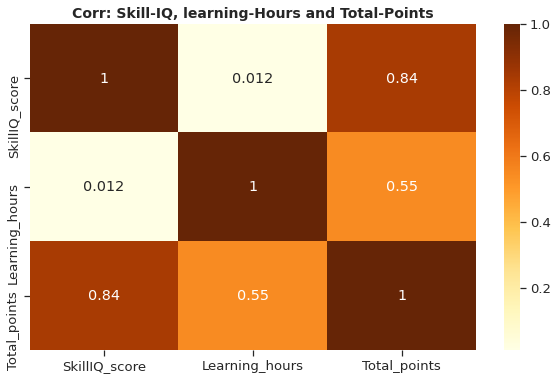

In [399]:
corr_data = qualified_metrics.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_data, annot=True, cmap='YlOrBr')
plt.title('Corr: Skill-IQ, learning-Hours and Total-Points',fontsize=14, fontweight='heavy')
plt.show()

<h4>Corr matrix Inference:</h4>
The correlation matrix shows some very interesting insights

1. Total-Points and SkillIQ-score are strongly correlated (0.84). This means as one increases, the other is very likely to increase too.
2. Total-Points and learning hours are positively correlated (0.55). This means as one incrreasesm the other generally tends to increase too.
3. Amazingly, Learning-Hours and Skill-IQ scores have virtually no correlation at all (0.012).<br>In statistics we say correlation does not imply causation.Yet it is a wonder that scoring high IQ appears to have nothing to do with watching long-hours of content and also watching long hours of content appears to have nothing to do with scoring a high IQ score.

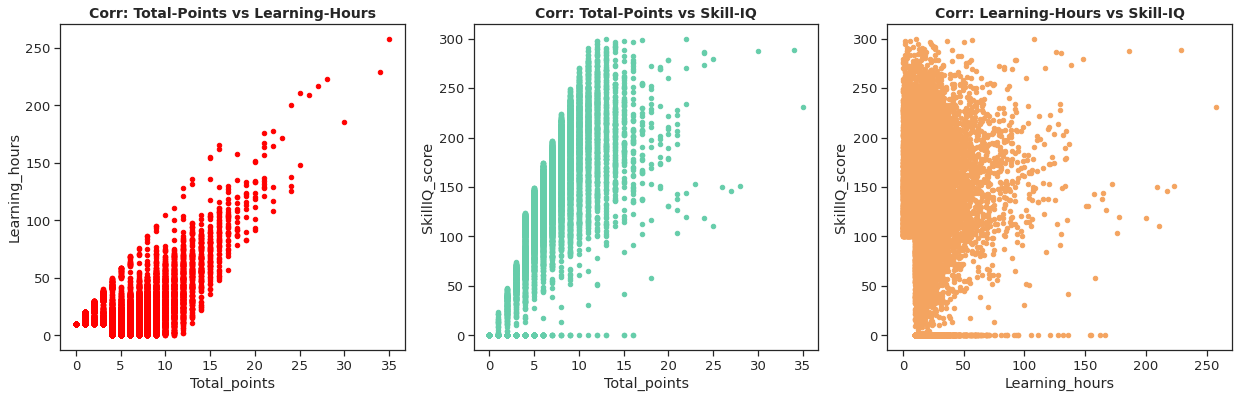

In [400]:
fig = plt.figure(figsize=(21,6))
sns.set_style('ticks')

ax0 = fig.add_subplot(131)
ax1 = fig.add_subplot(132)
ax2 = fig.add_subplot(133)

qualified_metrics.plot(kind='scatter',
        x='Total_points',
        y='Learning_hours',
        color='red',
        ax=ax0)
ax0.set_title('Corr: Total-Points vs Learning-Hours',fontsize=14,fontweight='heavy')


qualified_metrics.plot(kind='scatter',
        x='Total_points',
        y='SkillIQ_score',
        color='mediumaquamarine',
        ax=ax1)
ax1.set_title('Corr: Total-Points vs Skill-IQ',fontsize=14,fontweight='heavy')


qualified_metrics.plot(kind='scatter',
        x='Learning_hours',
        y='SkillIQ_score',
        color='sandybrown',
        ax=ax2)
ax2.set_title('Corr: Learning-Hours vs Skill-IQ',fontsize=14,fontweight='heavy')


plt.show()

<h4>PDF Plots:</h4>

We can also see the probability-Density-Function Plots for each metric below:-

A PDF is used to specify the probability of the random variable falling within a particular range of values, as opposed to taking on any one value

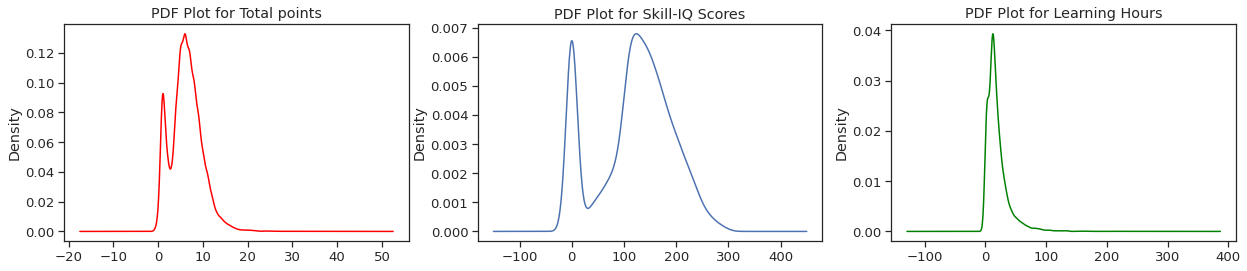

In [401]:
fig = plt.figure(figsize=(21,4))
fig.add_subplot(1,3,1)
qualified_students_df['Total_points'].plot.kde(color='red')
plt.title('PDF Plot for Total points')

fig.add_subplot(1,3,2)
qualified_students_df['SkillIQ_score'].plot.kde()
plt.title('PDF Plot for Skill-IQ Scores')

fig.add_subplot(1,3,3)
qualified_students_df['Learning_hours'].plot.kde(color='green')
plt.title('PDF Plot for Learning Hours')


plt.show()

<h3><b>Country Analysis</b></h3>

First, let's see the list of countries represented as at end of Phase One

In [402]:
country_list = qualified_students_df.Country.unique()
print(len(country_list))
country_list

52


array(['Nigeria', 'Kenya', 'South Sudan', 'Tunisia', 'Ethiopia',
       'Morocco', 'Egypt', 'Algeria', 'Ghana', 'Zimbabwe', 'Swaziland',
       'Togo', 'South Africa', 'Uganda', 'Mauritius',
       'Tanzania, United Republic Of', 'Chad', 'Rwanda', 'Cameroon',
       'Benin', 'Mauritania', 'Zambia', 'Malawi', 'Congo, (Kinshasa)',
       'Sierra Leone', 'Mozambique', 'Madagascar', 'Namibia', 'Mali',
       'Botswana', 'Gabon', 'Democratic Republic Of Congo',
       'Congo (Brazzaville)', 'Burkina Faso', 'Burundi', 'Guinea',
       'Senegal', 'Somalia', "Côte D'Ivoire", 'Republic Of Congo',
       'Angola', 'Gambia', 'Lesotho', 'Liberia', 'Libya', 'Niger',
       'Sudan', 'Cape Verde', 'Libyan Arab Jamahiriya',
       'Central African Republic', 'Eritrea', 'Equatorial Guinea'],
      dtype=object)

Let's see the Top 10 countries with highest number of Qualified Students

In [403]:
country_df = qualified_students_df.groupby('Country').size().to_frame()
country_df.columns = ['Count']
country_df['Pct-Total'] = (country_df.Count / len(qualified_students_df))* 100
country_df.head()

,Count,Pct-Total
Country,,
Algeria,127,0.935819
Angola,19,0.140004
Benin,68,0.501068
Botswana,55,0.405276
Burkina Faso,18,0.132636


Now let's sort the countries in descending order

In [404]:
country_df.sort_values(by='Pct-Total', ascending=False, inplace=True)

country_df.head(5)

,Count,Pct-Total
Country,,
Nigeria,6123,45.118267
Kenya,2310,17.021590
South Africa,1148,8.459215
Ghana,696,5.128583
Uganda,442,3.256945


Let's select the top-ten countries for our visualization

In [405]:
top_ten = country_df.head(10)

# Next, let's rename 'Tanzania, United Republic Of' to just Tanzania

as_list = top_ten.index.tolist()
idx = as_list.index('Tanzania, United Republic Of')
as_list[idx] = 'Tanzania'
top_ten.index = as_list

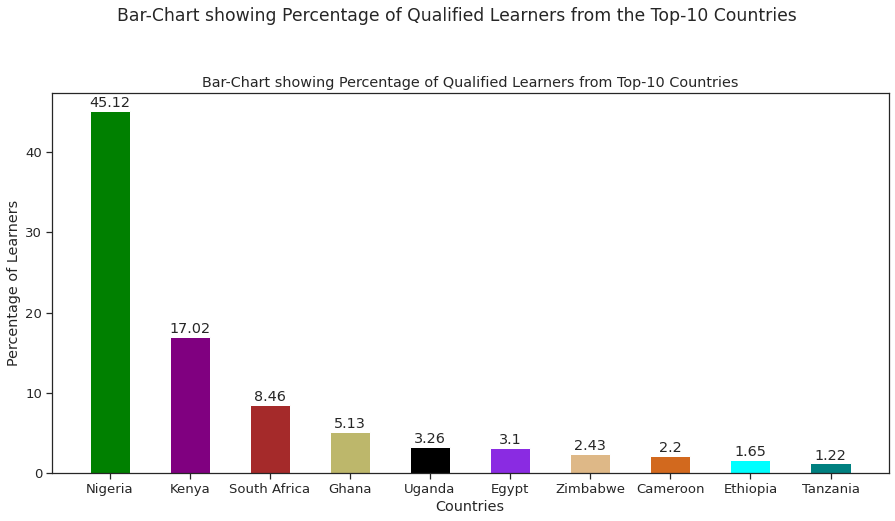

In [406]:
plt.figure(figsize=(15, 7))
sns.set(font_scale=1.2)
sns.set_style('ticks') # change background to white background
plt.suptitle('Bar-Chart showing Percentage of Qualified Learners from the Top-10 Countries', y=1.05)

# For The Bar chart
#plt.subplot(121)
color_list = ['green','purple','brown', 'darkkhaki', 'black', 'blueviolet', 'burlywood', 'chocolate', 'cyan', 'teal']
plt.bar(x=top_ten.index, height=top_ten['Pct-Total'], data=country_df, color= color_list, width=0.5)
plt.title('Bar-Chart showing Percentage of Qualified Learners from Top-10 Countries')
plt.xlabel('Countries')
plt.ylabel('Percentage of Learners')
for x,y in zip(top_ten.index, top_ten['Pct-Total']):
    label = round(y,2)  #  could also be written as:-   "{:.2f}".format(y)
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,4), # distance from text to points (x,y)
                 ha='center',) # horizontal alignment can be left, right or center

plt.show()